# Machine Learning Foundation

## Course 5, Part c: Backpropagation DEMO

## Overview
In this exercise we will use backpropagation to train a multi-layer perceptron (with a single hidden layer).  We will experiment with different patterns and see how quickly or slowly the weights converge.  We will see the impact and interplay of different parameters such as learning rate, number of iterations, and number of data points.

In [1]:
#Setup
import numpy as np
import matplotlib.pyplot as plt

In this exercise, we will prepare code to create a multi-layer perceptron with a single hidden layer (with 4 nodes) and train it via back-propagation.  We will take the following steps:

1. Initialize the weights to random values between -1 and 1
1. Perform the feed-forward computation
1. Compute the loss function
1. Calculate the gradients for all the weights via back-propagation
1. Update the weight matrices (using a learning_rate parameter)
1. Execute steps 2-5 for a fixed number of iterations
1. Plot the accuracies and log loss and observe how they change over time


Once the code is running, we can address the following questions:
- Which patterns was the neural network able to learn quickly and which took longer?
- What learning rates and numbers of iterations worked well?
- If you have time, try varying the size of the hidden layer and experiment with different activation functions (e.g. ReLu)

shape of x_mat_full is (500, 3)
shape of y is (500,)


/var/folders/l_/zm4hhkbx0s7g8q8x82psvpcc0000gn/T/ipykernel_5833/1521467101.py:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
/var/folders/l_/zm4hhkbx0s7g8q8x82psvpcc0000gn/T/ipykernel_5833/1521467101.py:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='darkred')


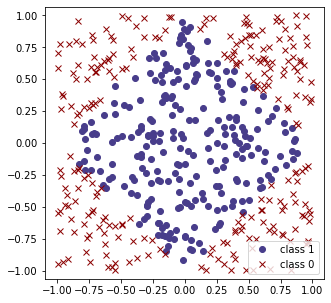

In [2]:
## This code below generates two x values and a y value according to different patterns
## It also creates a "bias" term (a vector of 1s)
## The goal is then to learn the mapping from x to y using a neural network via back-propagation

num_obs = 500
x_mat_1 = np.random.uniform(-1,1, size = (num_obs,2)) # value ranges from -1 to 1, [500 * 2] size
x_mat_bias = np.ones((num_obs,1)) # [500*1] size
x_mat_full = np.concatenate( (x_mat_1,x_mat_bias), axis=1)

# PICK ONE PATTERN BELOW and comment out the rest.

# # Circle pattern
# y = (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75).astype(int)

# # Diamond Pattern
y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int) #True or false inside or outside the range?
#(The addition of the two numbers should be less than one to be true)

# # Centered square
# y = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.5).astype(int)

# # Thick Right Angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)

# # Thin right angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int)


print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='darkred')
# Two plots to distinguish between the two classes, plot once when y = 1, and once when y = 0
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

Here are some helper functions

In [3]:
np.log(0.9999999999)

-1.000000082790371e-10

In [4]:
np.log(0.000000001) 

-20.72326583694641

In [5]:
def sigmoid(x):
    """
    Sigmoid function
    """
    return 1.0 / (1.0 + np.exp(-x))


def loss_fn(y_true, y_pred, eps=1e-16):
    """
    Loss function we would like to optimize (minimize)
    We are using Logarithmic Loss
    http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss
    """
    y_pred = np.maximum(y_pred,eps) # To avoid making our preds = 0
    y_pred = np.minimum(y_pred,(1-eps)) # To avoid making our preds = 1
    return -(np.sum(y_true * np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)
    # Looking at the above two cells, we know that if y_true and pred are close, then the outpout of multiplcation is going to be 0 
    # log loss is about either cancelling out or ending up with high value of error.
def forward_pass(W1, W2):
    """
    Does a forward computation of the neural network
    Takes the input `x_mat` (global variable) and produces the output `y_pred`
    Also produces the gradient of the log loss function
    """
    global x_mat # Take the value of x_mat from outside
    global y
    global num_
    # First, compute the new predictions `y_pred`
    z_2 = np.dot(x_mat, W_1)
    a_2 = sigmoid(z_2)
    z_3 = np.dot(a_2, W_2)
    y_pred = sigmoid(z_3).reshape((len(x_mat),)) # Reshaping to ensure it is only one dimension.
    # Now compute the gradient
    # We observe that the calculation of gradient is based on calculation the error, i.e., the cost function
    J_z_3_grad = -y + y_pred # we switched the signs to be descending.
    # Then we calculate the gradients of previous weights and zs as well based on the previous gradient
    J_W_2_grad = np.dot(J_z_3_grad, a_2)
    a_2_z_2_grad = sigmoid(z_2)*(1-sigmoid(z_2))
    J_W_1_grad = (np.dot((J_z_3_grad).reshape(-1,1), W_2.reshape(-1,1).T)*a_2_z_2_grad).T.dot(x_mat).T
    gradient = (J_W_1_grad, J_W_2_grad)
    
    # return
    return y_pred, gradient


def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle('Log Loss and Accuracy over iterations')
    
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Log Loss')
    
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy');

iteration 0, log loss is 0.8135, accuracy is 0.498
iteration 200, log loss is 0.6860, accuracy is 0.554
iteration 400, log loss is 0.6716, accuracy is 0.626
iteration 600, log loss is 0.6115, accuracy is 0.766
iteration 800, log loss is 0.5303, accuracy is 0.766
iteration 1000, log loss is 0.4986, accuracy is 0.772
iteration 1200, log loss is 0.4743, accuracy is 0.78
iteration 1400, log loss is 0.4221, accuracy is 0.804
iteration 1600, log loss is 0.3673, accuracy is 0.85
iteration 1800, log loss is 0.3269, accuracy is 0.872
iteration 2000, log loss is 0.2901, accuracy is 0.9
iteration 2200, log loss is 0.2582, accuracy is 0.906
iteration 2400, log loss is 0.2342, accuracy is 0.932
iteration 2600, log loss is 0.2168, accuracy is 0.942
iteration 2800, log loss is 0.2040, accuracy is 0.964
iteration 3000, log loss is 0.1942, accuracy is 0.966
iteration 3200, log loss is 0.1865, accuracy is 0.968
iteration 3400, log loss is 0.1802, accuracy is 0.968
iteration 3600, log loss is 0.1750, acc

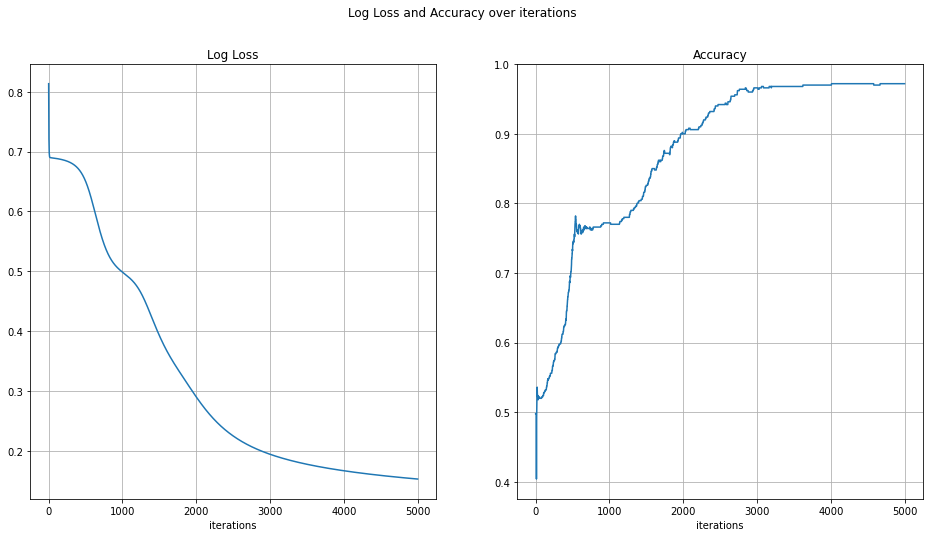

In [6]:
#### Initialize the network parameters

np.random.seed(1241)

W_1 = np.random.uniform(-1,1,size=(3,4)) # Setting random weights
W_2 = np.random.uniform(-1,1,size=(4))
num_iter = 5000
learning_rate = .001
# Steepest Descent Numerical Optimization
x_mat = x_mat_full


loss_vals, accuracies = [], []
for i in range(num_iter):
    ### Do a forward computation, and get the gradient
    y_pred, (J_W_1_grad, J_W_2_grad) = forward_pass(W_1, W_2)
    
    ## Update the weight matrices
    W_1 = W_1 - learning_rate*J_W_1_grad # Similar to steepest descent in Numerical optimization
    W_2 = W_2 - learning_rate*J_W_2_grad
    
    ### Compute the loss and accuracy
    curr_loss = loss_fn(y,y_pred) # From the created log loss function above
    loss_vals.append(curr_loss)
    acc = np.sum((y_pred>=.5) == y)/num_obs # Because we are using log loss, we are setting all values greater than 0.5 to be one. Otherwise, equal to 0
    accuracies.append(acc)

    ## Print the loss and accuracy for every 200th iteration
    if((i%200) == 0):
        print('iteration {}, log loss is {:.4f}, accuracy is {}'.format(
            i, curr_loss, acc
        ))
plot_loss_accuracy(loss_vals, accuracies)

Plot the predicted answers, with mistakes in yellow

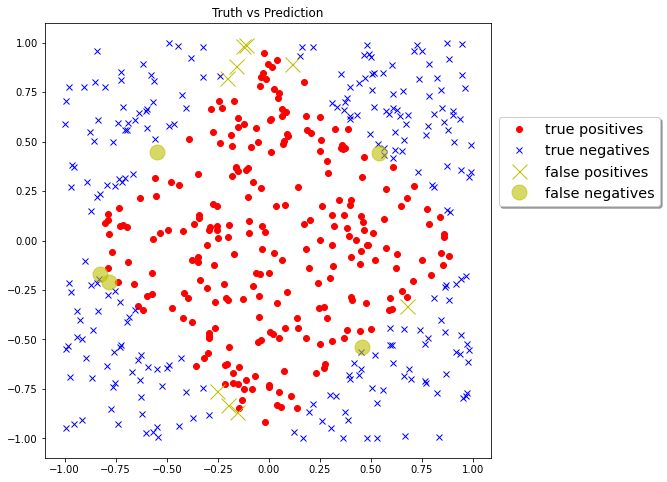

In [7]:
pred1 = (y_pred>=.5)
pred0 = (y_pred<.5)

fig, ax = plt.subplots(figsize=(8, 8))
# true predictions
ax.plot(x_mat[pred1 & (y==1),0],x_mat[pred1 & (y==1),1], 'ro', label='true positives')
ax.plot(x_mat[pred0 & (y==0),0],x_mat[pred0 & (y==0),1], 'bx', label='true negatives')
# false predictions
ax.plot(x_mat[pred1 & (y==0),0],x_mat[pred1 & (y==0),1], 'yx', label='false positives', markersize=15)
ax.plot(x_mat[pred0 & (y==1),0],x_mat[pred0 & (y==1),1], 'yo', label='false negatives', markersize=15, alpha=.6)
ax.set(title='Truth vs Prediction')
ax.legend(bbox_to_anchor=(1, 0.8), fancybox=True, shadow=True, fontsize='x-large');

### Trying Out the Right Angle Pattern 

shape of x_mat_full is (500, 3)
shape of y is (500,)


/var/folders/l_/zm4hhkbx0s7g8q8x82psvpcc0000gn/T/ipykernel_5833/231354770.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
/var/folders/l_/zm4hhkbx0s7g8q8x82psvpcc0000gn/T/ipykernel_5833/231354770.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='darkred')


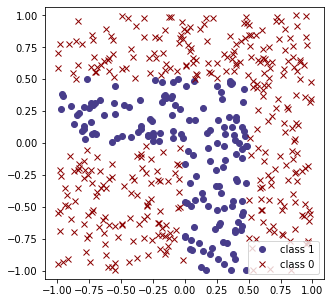

In [8]:
# # Thin right angle pattern
y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int)


print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='darkred')
# Two plots to distinguish between the two classes, plot once when y = 1, and once when y = 0
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

iteration 0, log loss is 0.6198, accuracy is 0.688
iteration 200, log loss is 0.6055, accuracy is 0.688
iteration 400, log loss is 0.5907, accuracy is 0.688
iteration 600, log loss is 0.5693, accuracy is 0.688
iteration 800, log loss is 0.5397, accuracy is 0.688
iteration 1000, log loss is 0.5055, accuracy is 0.748
iteration 1200, log loss is 0.4843, accuracy is 0.792
iteration 1400, log loss is 0.4736, accuracy is 0.806
iteration 1600, log loss is 0.4605, accuracy is 0.812
iteration 1800, log loss is 0.4407, accuracy is 0.83
iteration 2000, log loss is 0.4184, accuracy is 0.842
iteration 2200, log loss is 0.3892, accuracy is 0.844
iteration 2400, log loss is 0.3482, accuracy is 0.866
iteration 2600, log loss is 0.3039, accuracy is 0.874
iteration 2800, log loss is 0.2616, accuracy is 0.92
iteration 3000, log loss is 0.2257, accuracy is 0.946
iteration 3200, log loss is 0.1984, accuracy is 0.952
iteration 3400, log loss is 0.1780, accuracy is 0.958
iteration 3600, log loss is 0.1624, a

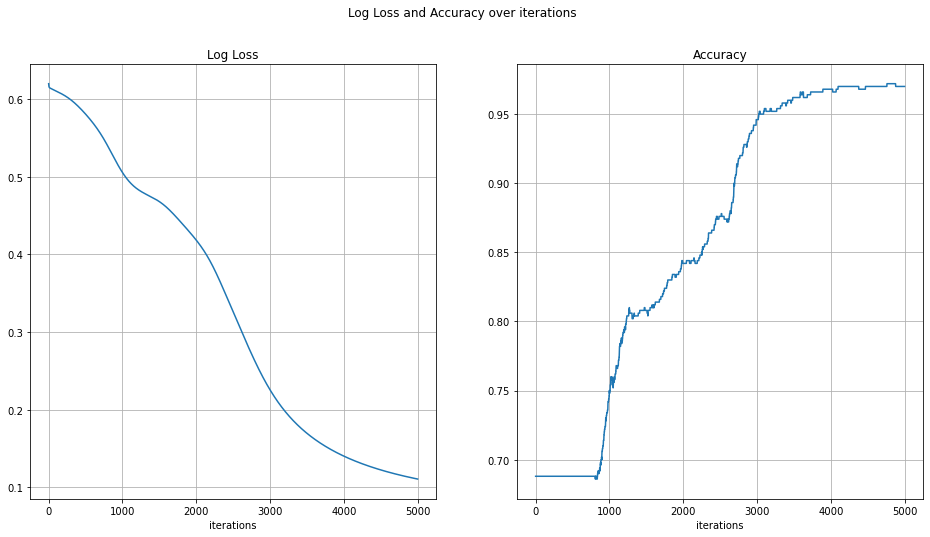

In [9]:
#### Initialize the network parameters

np.random.seed(1241)

W_1 = np.random.uniform(-1,1,size=(3,4)) # Setting random weights
W_2 = np.random.uniform(-1,1,size=(4))
num_iter = 5000
learning_rate = .001
# Steepest Descent Numerical Optimization
x_mat = x_mat_full


loss_vals, accuracies = [], []
for i in range(num_iter):
    ### Do a forward computation, and get the gradient
    y_pred, (J_W_1_grad, J_W_2_grad) = forward_pass(W_1, W_2)
    
    ## Update the weight matrices
    W_1 = W_1 - learning_rate*J_W_1_grad # Similar to steepest descent in Numerical optimization
    W_2 = W_2 - learning_rate*J_W_2_grad
    
    ### Compute the loss and accuracy
    curr_loss = loss_fn(y,y_pred) # From the created log loss function above
    loss_vals.append(curr_loss)
    acc = np.sum((y_pred>=.5) == y)/num_obs # Because we are using log loss, we are setting all values greater than 0.5 to be one. Otherwise, equal to 0
    accuracies.append(acc)

    ## Print the loss and accuracy for every 200th iteration
    if((i%200) == 0):
        print('iteration {}, log loss is {:.4f}, accuracy is {}'.format(
            i, curr_loss, acc
        ))
plot_loss_accuracy(loss_vals, accuracies)

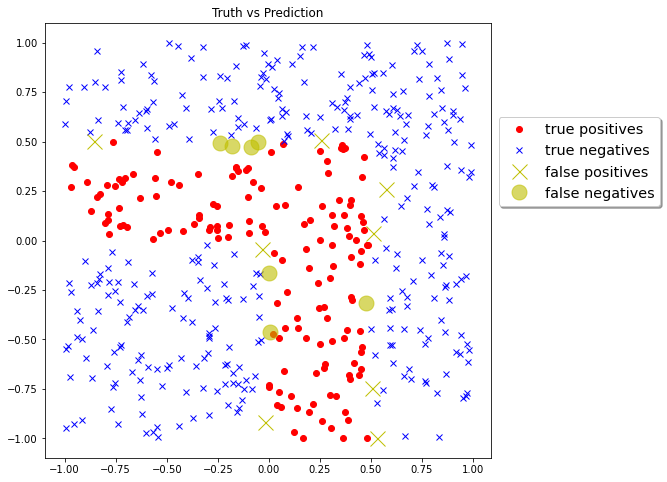

In [10]:
pred1 = (y_pred>=.5)
pred0 = (y_pred<.5)

fig, ax = plt.subplots(figsize=(8, 8))
# true predictions
ax.plot(x_mat[pred1 & (y==1),0],x_mat[pred1 & (y==1),1], 'ro', label='true positives')
ax.plot(x_mat[pred0 & (y==0),0],x_mat[pred0 & (y==0),1], 'bx', label='true negatives')
# false predictions
ax.plot(x_mat[pred1 & (y==0),0],x_mat[pred1 & (y==0),1], 'yx', label='false positives', markersize=15)
ax.plot(x_mat[pred0 & (y==1),0],x_mat[pred0 & (y==1),1], 'yo', label='false negatives', markersize=15, alpha=.6)
ax.set(title='Truth vs Prediction')
ax.legend(bbox_to_anchor=(1, 0.8), fancybox=True, shadow=True, fontsize='x-large');

### Trying Out the Circle Pattern 

shape of x_mat_full is (500, 3)
shape of y is (500,)


/var/folders/l_/zm4hhkbx0s7g8q8x82psvpcc0000gn/T/ipykernel_5833/959892220.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
/var/folders/l_/zm4hhkbx0s7g8q8x82psvpcc0000gn/T/ipykernel_5833/959892220.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='darkred')


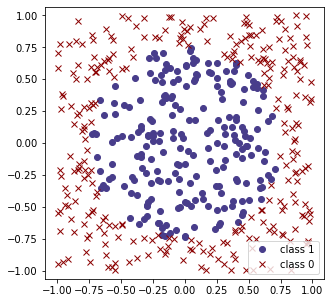

In [11]:
# # Circle pattern
y = (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75).astype(int)

print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='darkred')
# Two plots to distinguish between the two classes, plot once when y = 1, and once when y = 0
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

iteration 0, log loss is 0.7568, accuracy is 0.556
iteration 200, log loss is 0.6819, accuracy is 0.556
iteration 400, log loss is 0.6689, accuracy is 0.516
iteration 600, log loss is 0.6107, accuracy is 0.73
iteration 800, log loss is 0.5303, accuracy is 0.76
iteration 1000, log loss is 0.4925, accuracy is 0.768
iteration 1200, log loss is 0.4380, accuracy is 0.808
iteration 1400, log loss is 0.3528, accuracy is 0.884
iteration 1600, log loss is 0.2999, accuracy is 0.904
iteration 1800, log loss is 0.2729, accuracy is 0.904
iteration 2000, log loss is 0.2564, accuracy is 0.906
iteration 2200, log loss is 0.2448, accuracy is 0.908
iteration 2400, log loss is 0.2359, accuracy is 0.906
iteration 2600, log loss is 0.2285, accuracy is 0.91
iteration 2800, log loss is 0.2221, accuracy is 0.912
iteration 3000, log loss is 0.2163, accuracy is 0.914
iteration 3200, log loss is 0.2111, accuracy is 0.916
iteration 3400, log loss is 0.2063, accuracy is 0.92
iteration 3600, log loss is 0.2019, acc

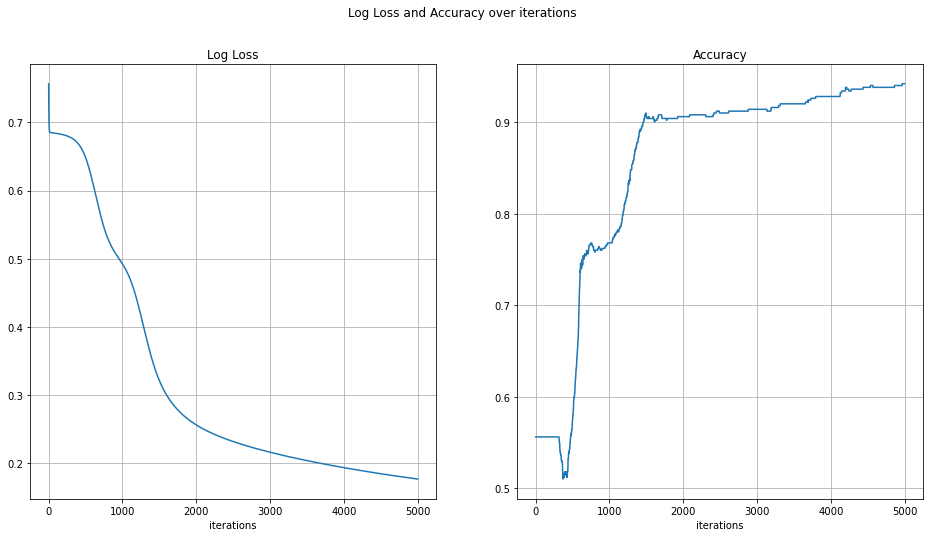

In [12]:
#### Initialize the network parameters

np.random.seed(1241)

W_1 = np.random.uniform(-1,1,size=(3,4)) # Setting random weights
W_2 = np.random.uniform(-1,1,size=(4))
num_iter = 5000
learning_rate = .001
# Steepest Descent Numerical Optimization
x_mat = x_mat_full


loss_vals, accuracies = [], []
for i in range(num_iter):
    ### Do a forward computation, and get the gradient
    y_pred, (J_W_1_grad, J_W_2_grad) = forward_pass(W_1, W_2)
    
    ## Update the weight matrices
    W_1 = W_1 - learning_rate*J_W_1_grad # Similar to steepest descent in Numerical optimization
    W_2 = W_2 - learning_rate*J_W_2_grad
    
    ### Compute the loss and accuracy
    curr_loss = loss_fn(y,y_pred) # From the created log loss function above
    loss_vals.append(curr_loss)
    acc = np.sum((y_pred>=.5) == y)/num_obs # Because we are using log loss, we are setting all values greater than 0.5 to be one. Otherwise, equal to 0
    accuracies.append(acc)

    ## Print the loss and accuracy for every 200th iteration
    if((i%200) == 0):
        print('iteration {}, log loss is {:.4f}, accuracy is {}'.format(
            i, curr_loss, acc
        ))
plot_loss_accuracy(loss_vals, accuracies)

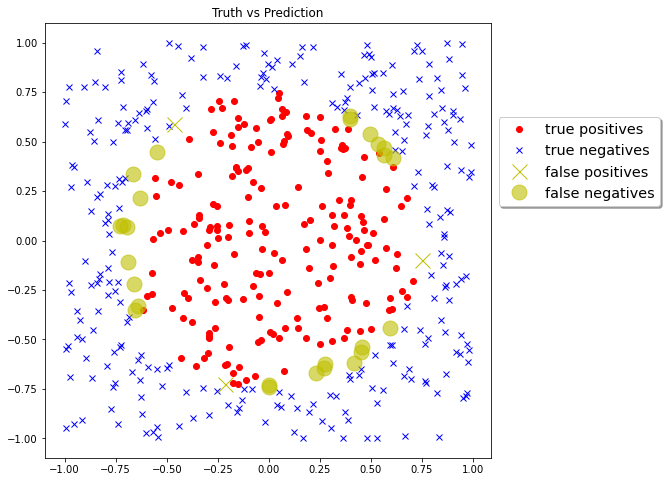

In [13]:
pred1 = (y_pred>=.5)
pred0 = (y_pred<.5)

fig, ax = plt.subplots(figsize=(8, 8))
# true predictions
ax.plot(x_mat[pred1 & (y==1),0],x_mat[pred1 & (y==1),1], 'ro', label='true positives')
ax.plot(x_mat[pred0 & (y==0),0],x_mat[pred0 & (y==0),1], 'bx', label='true negatives')
# false predictions
ax.plot(x_mat[pred1 & (y==0),0],x_mat[pred1 & (y==0),1], 'yx', label='false positives', markersize=15)
ax.plot(x_mat[pred0 & (y==1),0],x_mat[pred0 & (y==1),1], 'yo', label='false negatives', markersize=15, alpha=.6)
ax.set(title='Truth vs Prediction')
ax.legend(bbox_to_anchor=(1, 0.8), fancybox=True, shadow=True, fontsize='x-large');

---
### Machine Learning Foundation (C) 2020 IBM Corporation